In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("C:/Users/Avdhut Jagtap/Downloads/archive1/Admission_Predict.csv")

In [3]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.shape

(400, 9)

In [6]:
df = df.drop('Serial No.',axis=1)

In [7]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
df['Chance of Admit '] = [1 if each > 0.75 else 0 for each in df['Chance of Admit ']]
df.head()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [10]:
x = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA','Research']]

y = df['Chance of Admit ']


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=1)

In [13]:
print(f"Size of splitted data")
print(f"x_train {x_train.shape}")
print(f"y_train {y_train.shape}")
print(f"y_train {x_test.shape}")
print(f"y_test {y_test.shape}")

Size of splitted data
x_train (300, 7)
y_train (300,)
y_train (100, 7)
y_test (100,)


In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression


In [15]:
model_dt = DecisionTreeRegressor(random_state=1)
model_rf = RandomForestRegressor(random_state=1)
model_lr = LogisticRegression(random_state=1,solver='lbfgs',max_iter=1000)


In [16]:

model_dt.fit(x_train,y_train)


DecisionTreeRegressor(random_state=1)

In [17]:
model_rf.fit(x_train,y_train)

RandomForestRegressor(random_state=1)

In [18]:
model_lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000, random_state=1)

In [19]:
y_pred_dt = model_dt.predict(x_test) #int
y_pred_rf = model_rf.predict(x_test) #float
y_pred_lr = model_lr.predict(x_test) #


In [20]:
y_pred_rf = [1 if each > 0.75 else 0 for each in y_pred_rf]

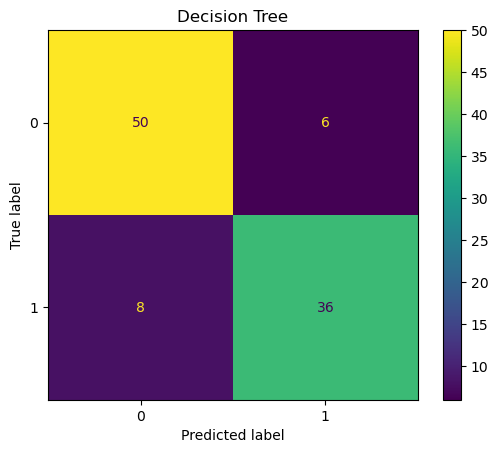

 Accuracy is 0.86
              precision    recall  f1-score   support

           0       0.86      0.89      0.88        56
           1       0.86      0.82      0.84        44

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



In [21]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_dt)
plt.title('Decision Tree')
plt.show()
print(f" Accuracy is {accuracy_score(y_test,y_pred_dt)}")
print(classification_report(y_test,y_pred_dt))
